Import relevant packages here.

In [1]:
#Import the needed libraries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

/Users/willemijndietz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Load the data and verify it is loaded correctly.
<ul>
    <li>Print it (head, tail, or specific rows, choose a sensible number of rows).</li>
    <li>Compare it to the source file.</li>
<ul>

In [2]:
#Open the file
#Make new dataframe consisting of the first 50 rows, meant for testing 
file_path = '/Users/willemijndietz/Documents/2022-2023/TIL6022/Week 4 /cf_data.csv'
data = pd.read_csv(file_path, sep=',')
data
data50 = data.head(50)

In [3]:
#Explore the data set
data.head(10)

,dv,s,a
0,-0.743240,53.5427,1.242570
1,-0.557230,53.6120,1.777920
2,-0.454769,53.6541,0.544107
3,-0.525396,53.7030,-0.294755
4,-0.601285,53.7592,-0.290961
5,-0.682448,53.8232,-0.283414
6,-0.768859,53.8957,-0.271604
7,-0.860452,53.9770,-0.133532
8,-0.832777,54.0678,0.243356
9,-0.576125,54.1436,0.406759


In [4]:
#Explore both datasets 
data.info()
data50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73908 entries, 0 to 73907
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dv      73908 non-null  float64
 1   s       73908 non-null  float64
 2   a       73908 non-null  float64
dtypes: float64(3)
memory usage: 1.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dv      50 non-null     float64
 1   s       50 non-null     float64
 2   a       50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In the ensuing, you will use <code>numpy</code>.

Lets create a grid for the values to plot. But first create <b>two arrays named <code>dv</code> and <code>s</code></b> using <code>numpy.linspace</code> that hold the grid values at the relevant indices in their respective dimension of the grid.

Create a <b>grid named <code>a</code></b> with zeros using <code>numpy.zeros</code> in to which calculated acceleration values can be stored.<br>
<br>
Let the grid span:<br>
<ul>
    <li>Speed difference <code>dv</code> [m/s]
        <ul>
            <li>From -10 till 10</li>
            <li>With 41 evenly spaced values</li>
        </ul>
    </li>
    <li>Headway <code>s</code> [m]
        <ul>
            <li>From 0 till 200</li>
            <li>With 21 evenly spaced values</li>
        </ul>
    </li>
</ul>

In [5]:
#Num creates evenly spaces values
#Creating the grid 
dv = np.linspace(-10, 10, num=41)
s = np.linspace(0, 200, num=21)

#Create array with zeros, accelaration can be stored here
a = np.zeros((s.shape[0], dv.shape[0]))

Create from the imported data 3 separate <code>numpy</code> arrays for each column <code>dv</code>, <code>s</code> and <code>a</code>. (We do this for speed reasons later.)
<ul>
    <li>Make sure to name them differently from the arrays that belong to the grid as above.</li>
    <li>You can access the data of each column in a <code>DataFrame</code> using <code>data.xxx</code> where <code>xxx</code> is the column name (not as a string).</li>
    <li>Use the method <code>to_numpy()</code> to convert a column to a <code>numpy</code> array.</li>
</ul>

In [6]:
#Get column and convert to numpy array
DV = data.dv.to_numpy()
S = data.s.to_numpy()
A = data.a.to_numpy()

Create an algorithm that calculates all the acceleration values and stores them in the grid. The algorithm is described visually in the last part of the lecture. At each grid point, it calculates a weighted mean of all measurements. The weights are given by an exponential function, based on the 'distance' between the grid point, and the measurement values of <code>dv</code> and <code>s</code>. To get you started, how many <code>for</code>-loops do you need?<br>
<br>
For this you will need <code>math</code>.<br>
Use an <i>upsilon</i> of 1.5m/s and a <i>sigma</i> of 30m.<br>
<br>
<b>Warning:</b> This calculation may take some time. So:
<ul>
    <li>Print a line for each iteration of the outer-most <code>for</code>-loop that shows you the progress.</li>
    <li>Test you code by running it only on the first 50 measurements of the data.</li>
</ul>

In [7]:
#For the testing we get the first 50 lines of the data 
DV50 = data50.dv.to_numpy()
S50 = data50.s.to_numpy()
A50 = data50.a.to_numpy()

#Small a to store 50 values in 
a50 = np.zeros((s.shape[0], dv.shape[0]))

In [8]:
#CODE FOR A SINGLE VALUE e.g. (1.0, 80.0)
#Initialize the two sums to be zero
sum_w = 0 
sum_wa = 0

#The first loop calculates the weighted average for one value
for i in range(len(data50)):
    weight = math.exp(-(abs(DV50[i] - 1.0)/1.5) - (abs(S50[i] - 80.0)/30))
    sum_w = sum_w + weight    #Increase sum each iteration
    sum_wa = sum_wa + (weight * A50[i])    #Increase sum each iteration 


#At the end of the loop, for this specific value, the weighted avg sum is returned   
weighted_avg_sum = sum_wa/sum_w
print(weighted_avg_sum)

0.6751282152501584


In [9]:
#CODE FOR 50 DATA POINTS, TESTING 
#3 LOOPS 
for i in range(dv.shape[0]):
    print('step ', i+1, ' out of ', dv.shape[0])    #Print steps to see progress
    for j in range(s.shape[0]):
        #Initialize sum to be zero 
        sum_w = 0
        sum_wa = 0
        for k in range(len(data50)):
            weight = math.exp(-(abs(DV50[k] - dv[i])/1.5) - (abs(S50[k] - s[j])/30))
            sum_w = sum_w + weight    #Increase sum each iteration
            sum_wa = sum_wa + (weight * A50[k])    #Increase sum each iteration 
        weighted_avg_sum = sum_wa/sum_w
        #Assign weighted value
        a50[j][i] = weighted_avg_sum

step  1  out of  41
step  2  out of  41
step  3  out of  41
step  4  out of  41
step  5  out of  41
step  6  out of  41
step  7  out of  41
step  8  out of  41
step  9  out of  41
step  10  out of  41
step  11  out of  41
step  12  out of  41
step  13  out of  41
step  14  out of  41
step  15  out of  41
step  16  out of  41
step  17  out of  41
step  18  out of  41
step  19  out of  41
step  20  out of  41
step  21  out of  41
step  22  out of  41
step  23  out of  41
step  24  out of  41
step  25  out of  41
step  26  out of  41
step  27  out of  41
step  28  out of  41
step  29  out of  41
step  30  out of  41
step  31  out of  41
step  32  out of  41
step  33  out of  41
step  34  out of  41
step  35  out of  41
step  36  out of  41
step  37  out of  41
step  38  out of  41
step  39  out of  41
step  40  out of  41
step  41  out of  41


In [10]:
#CODE FOR ALL DATA POINTS
#3 LOOPS 

for i in range(dv.shape[0]):
    print('step ', i+1, ' out of ', dv.shape[0])    #Print steps to see progress
    for j in range(s.shape[0]):
        sum_w = 0
        sum_wa = 0
        for k in range(len(data)):
            weight = math.exp(-(abs(DV[k] - dv[i])/1.5) - (abs(S[k] - s[j])/30))
            sum_w = sum_w + weight    #Increase sum each iteration
            sum_wa = sum_wa + (weight * A[k]) 
        weighted_avg_sum = sum_wa/sum_w
        a[j][i] = weighted_avg_sum

step  1  out of  41
step  2  out of  41
step  3  out of  41
step  4  out of  41
step  5  out of  41
step  6  out of  41
step  7  out of  41
step  8  out of  41
step  9  out of  41
step  10  out of  41
step  11  out of  41
step  12  out of  41
step  13  out of  41
step  14  out of  41
step  15  out of  41
step  16  out of  41
step  17  out of  41
step  18  out of  41
step  19  out of  41
step  20  out of  41
step  21  out of  41
step  22  out of  41
step  23  out of  41
step  24  out of  41
step  25  out of  41
step  26  out of  41
step  27  out of  41
step  28  out of  41
step  29  out of  41
step  30  out of  41
step  31  out of  41
step  32  out of  41
step  33  out of  41
step  34  out of  41
step  35  out of  41
step  36  out of  41
step  37  out of  41
step  38  out of  41
step  39  out of  41
step  40  out of  41
step  41  out of  41


The following code will plot the data for you. Does it make sense when considering:
<ul>
    <li>Negative (slower than leader) and positive (faster than leader) speed differences?</li>
    <li>Small and large headways?</li>
</ul>

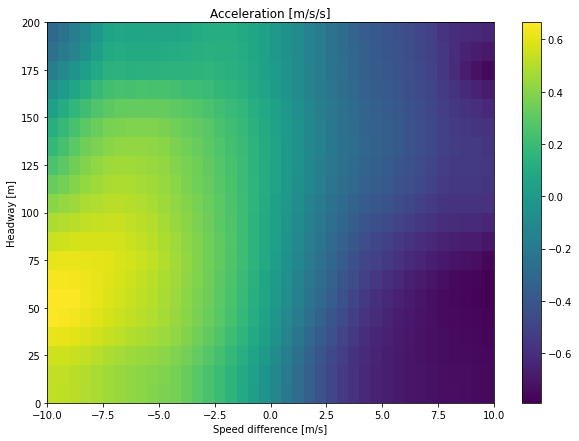

In [11]:
#Plot the data 

X, Y = np.meshgrid(dv, s)
axs = plt.axes()
p = axs.pcolor(X, Y, a) # shading='nearest') #Shading function gives an error.. 
axs.set_title('Acceleration [m/s/s]')
axs.set_xlabel('Speed difference [m/s]')
axs.set_ylabel('Headway [m]')
axs.figure.colorbar(p);
axs.figure.set_size_inches(10, 7)

#s in meters depicts distance to leader
#dv in m/s depicts speed difference to leader 

#We see when the distance to leader is between 25 - 75 meter and the speed difference is large and negative (-5 to -10)
#Then the positive acceleration is largest 
#Acceleration needed for overtaking, so this makes sense
#Also when the distance to the leader is small (0 - 75 meter) and the speed difference is large and positive (2.5 - 10)
#Then the negative acceleration is largest
#Makes sense because one then has to brake 